Energy_Census

In [59]:
%matplotlib notebook

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.style as style 
# style.available

In [61]:
plt.style.use('fast')

In [62]:
Data = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
#Data.count()

In [90]:
# Reduce the amount of data
Data_Reduced = Data[["State", "StateCodes", "Region", "Division", "Coast", "Great Lakes", 
                     "TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalC2014", 
                     "TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013", "TotalP2014",
                     "TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013", "TotalE2014",
                     "TotalPrice2010", "TotalPrice2011", "TotalPrice2012", "TotalPrice2013", "TotalPrice2014",
                     "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]]

# Remove unwanted data
Data_Reduced = Data_Reduced[Data_Reduced.State != "United States"] 
Data_Reduced = Data_Reduced[Data_Reduced.State != "District of Columbia"]

# Sort order
Data_Reduced = Data_Reduced.sort_values(by=['TotalC2010'], ascending=False)
#Data_Reduced.head()

In [64]:
# Used as variable for determining loop
years = ["2010", "2011", "2012", "2013", "2014"]
years

['2010', '2011', '2012', '2013', '2014']

<IPython.core.display.Javascript object>


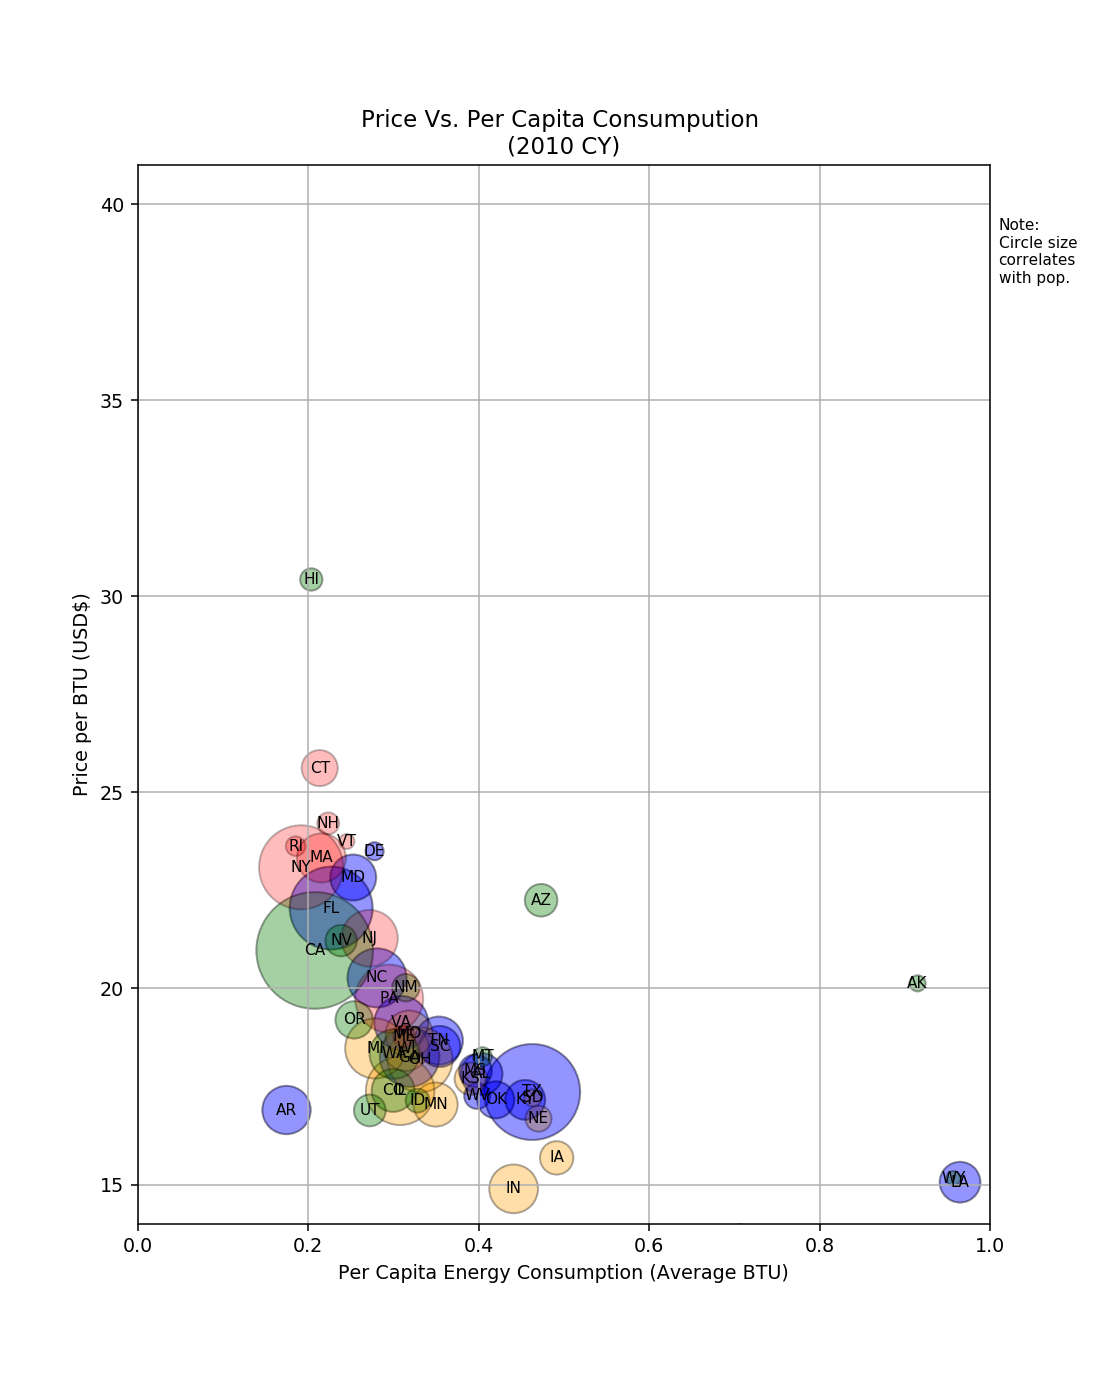

<IPython.core.display.Javascript object>


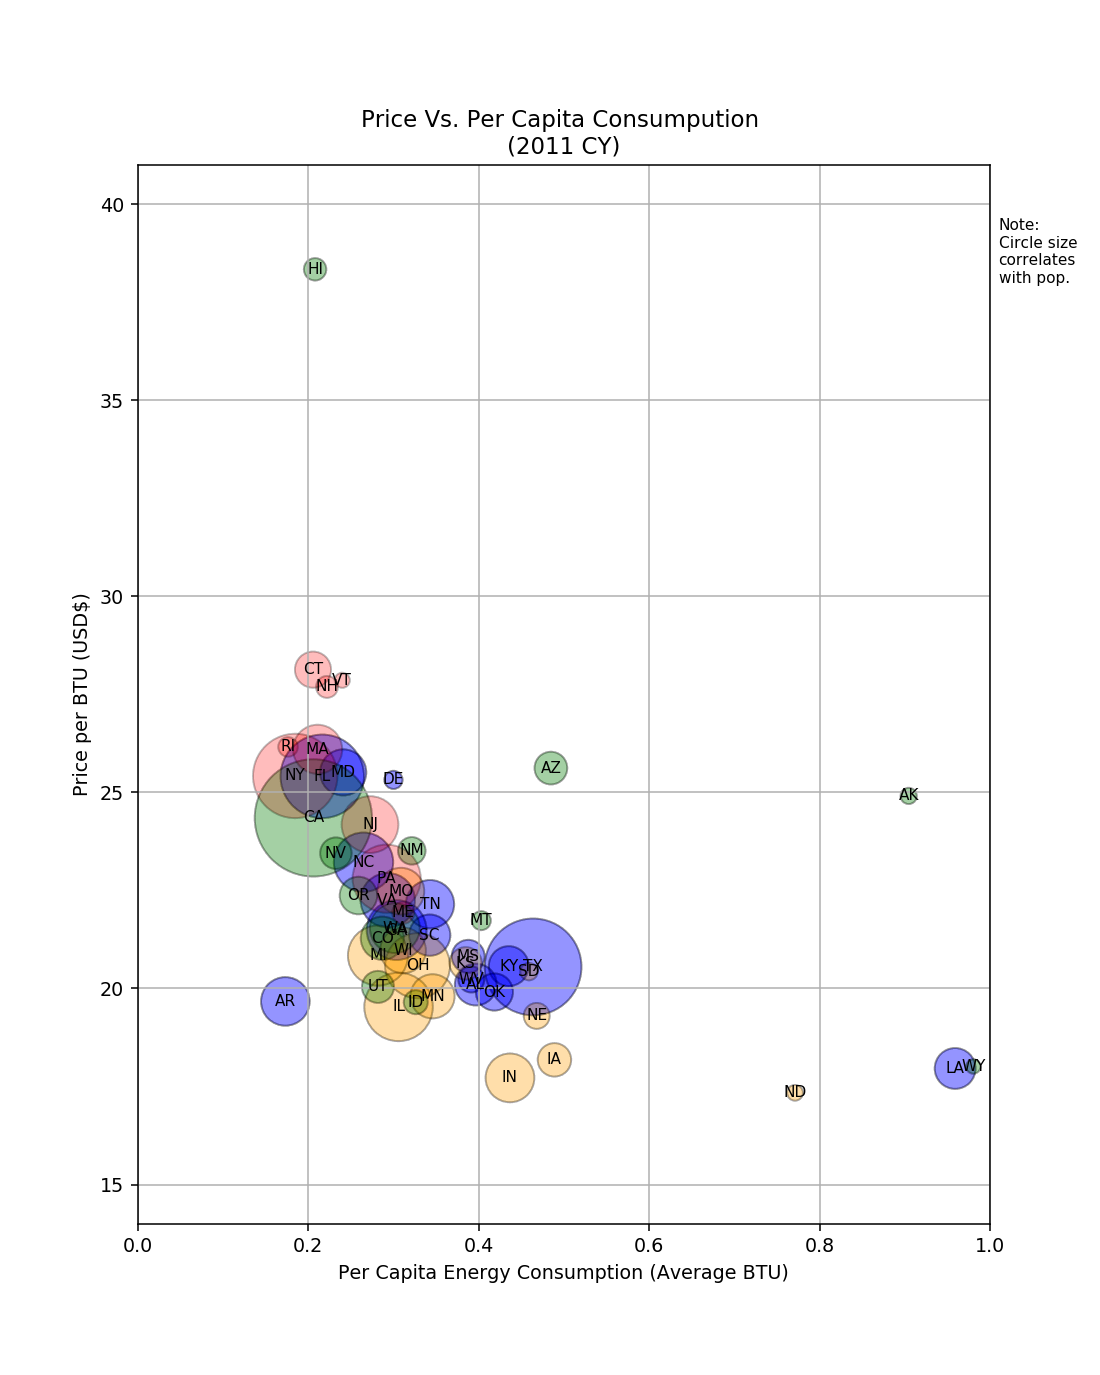

<IPython.core.display.Javascript object>


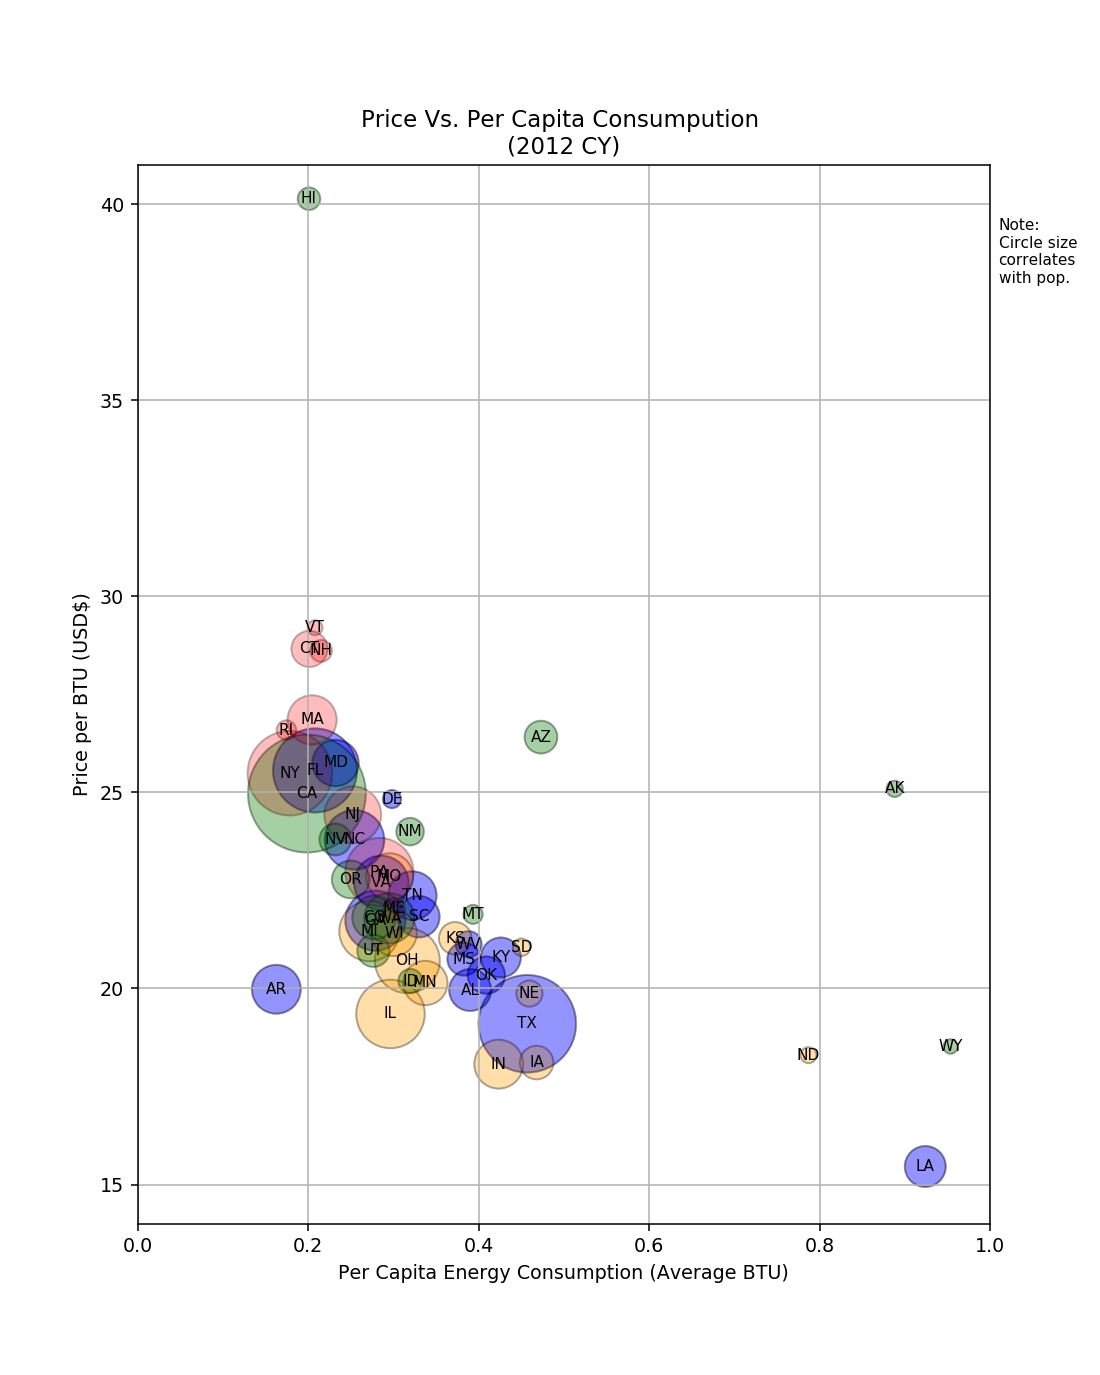

<IPython.core.display.Javascript object>


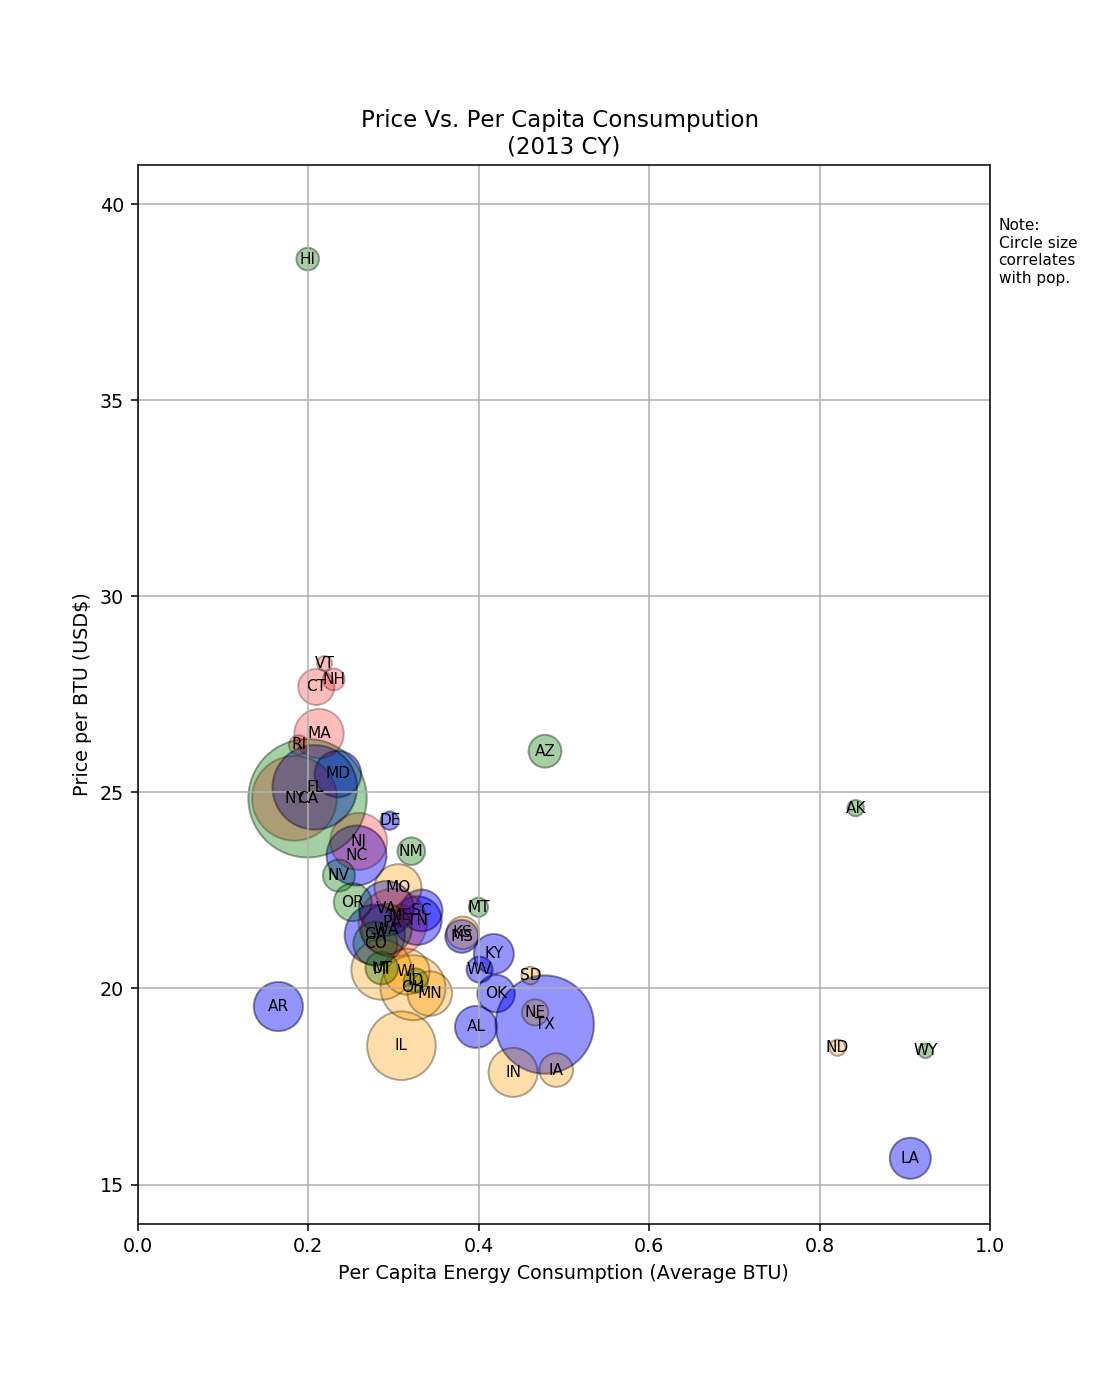

<IPython.core.display.Javascript object>


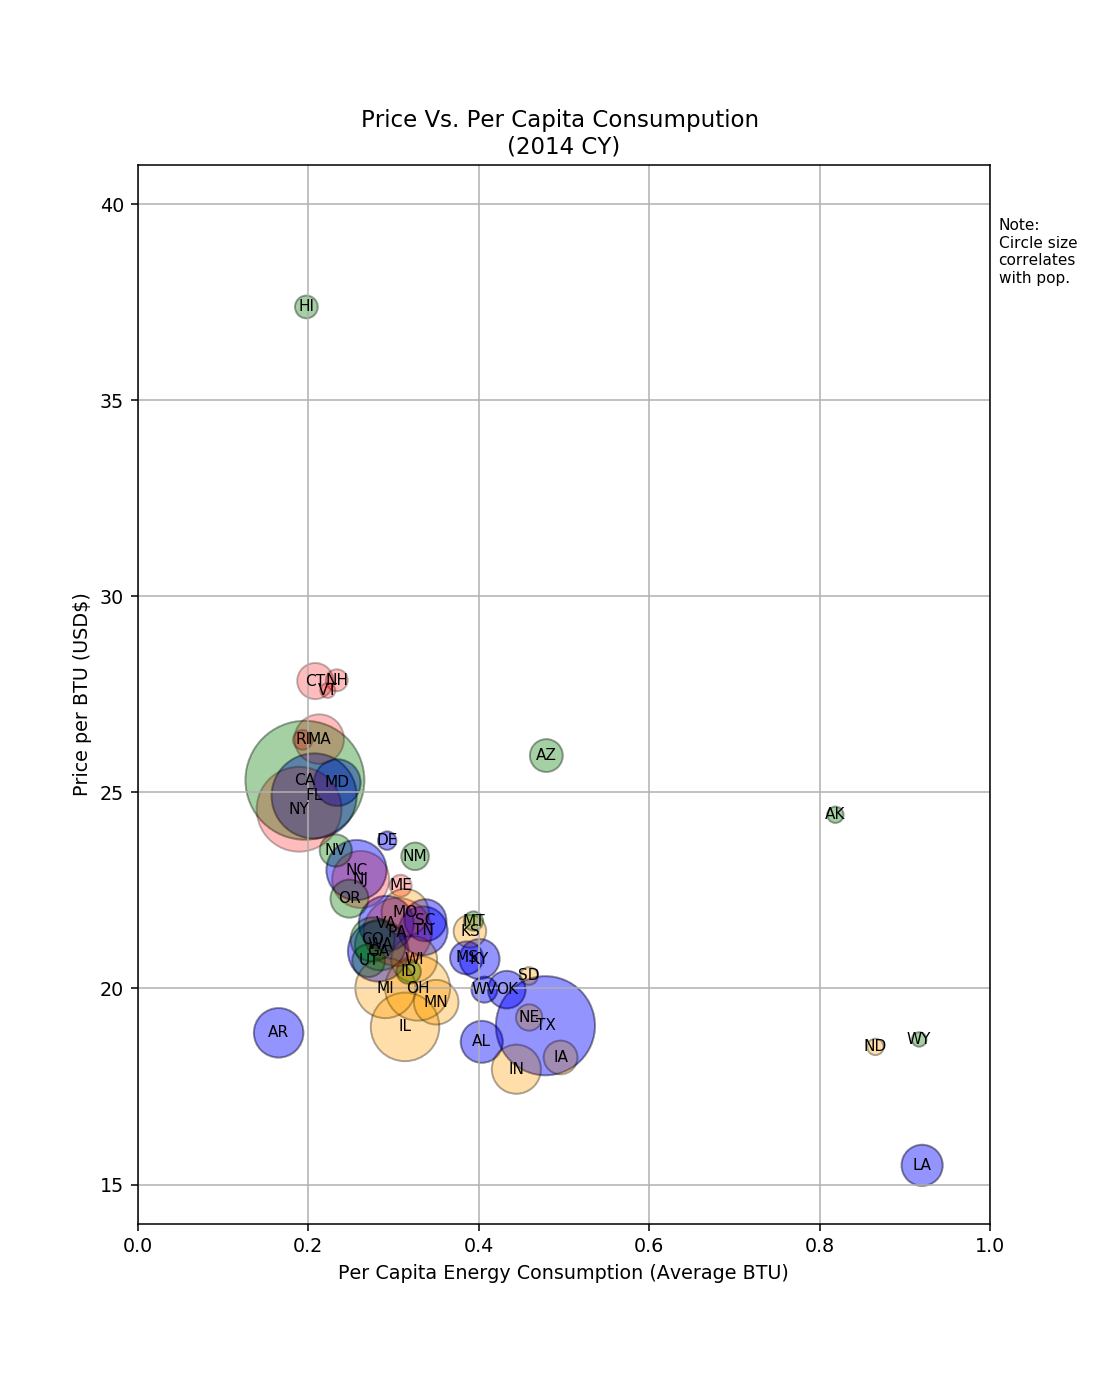

In [101]:
# Loop through each year creating plots 
for year in years:
    
    # Set canvass size
    plt.figure(figsize=(8,10))
    
    # Create Region variable
    Region = Data_Reduced["Region"]
    
    # Loop through each region
    for reg in region:
        
        RegData = Data_Reduced.loc[Data_Reduced["Region"] == reg, :]    

        BTUCapR = RegData["TotalC"+year]/RegData["POPESTIMATE"+year]
        PriceR = RegData["TotalPrice"+year]
        PopR = RegData["POPESTIMATE"+year]
        
        if reg == 1.0:
            
            plt.scatter(BTUCapR, PriceR, s=PopR/10000, c="red", marker="o", edgecolor="black", linewidths=1, 
                        alpha=0.03, label="Northeast")
        
        if reg == 2.0:
            
            plt.scatter(BTUCapR, PriceR, s=PopR/10000, c="orange", marker="o", edgecolor="black", linewidths=1, 
                        alpha=0.03, label="Central")
            
        if reg == 3.0:
       
            plt.scatter(BTUCapR, PriceR, s=PopR/10000, c="blue", marker="o", edgecolor="black", linewidths=1,
                        alpha=0.03, label="Southeast")
        
        if reg == 4.0:
            
            plt.scatter(BTUCapR, PriceR, s=PopR/10000, c="green", marker="o", edgecolor="black", linewidths=1,
                        alpha=0.03, label="Western")

            # Add circle color legend
# lgnd = plt.legend(fontsize="small", numpoints=1, scatterpoints=1, 
#                          loc="best", title="Regions", labelspacing=1)    
#        lgnd.legendHandles[0]._sizes = [150]
 #       lgnd.legendHandles[1]._sizes = [150]
#        lgnd.legendHandles[2]._sizes = [150]
#        lgnd.legendHandles[3]._sizes = [150]            
            
            
    # Required for adding State Code Labels
    BTUCap = Data_Reduced["TotalC"+year]/Data_Reduced["POPESTIMATE"+year]
    Price = Data_Reduced["TotalPrice"+year]
    Pop = Data_Reduced["TotalC"+year]/Data_Reduced["POPESTIMATE"+year]
    States = Data_Reduced["StateCodes"]

    # Loop through States and assign state label
    for i in range(len(States)):
        plt.annotate(States[i], xy=(BTUCap[i], Price[i]), fontsize=8, 
                     horizontalalignment='center', verticalalignment='center')   

# Add circle color legend
#lgnd = plt.legend(fontsize="small", numpoints=1, scatterpoints=1,
 #               loc="best", title="Regions", labelspacing=1)    
#    lgnd.legendHandles[0]._sizes = [150]
#    lgnd.legendHandles[1]._sizes = [150]
#    lgnd.legendHandles[2]._sizes = [150]
#    lgnd.legendHandles[3]._sizes = [150]

    # Add text to describe circe size
    plt.text(1.01, 38, "Note:\nCircle size \ncorrelates\nwith pop.", fontsize=8)

    # Diplay results
    plt.tight_layout
    plt.ylim(14, 41)
    plt.xlim(0, 1)
    plt.title("Price Vs. Per Capita Consumpution \n("+year+" CY)")
    plt.ylabel("Price per BTU (USD$)")
    plt.xlabel("Per Capita Energy Consumption (Average BTU)")
    plt.grid()
    plt.show()

   # SaveFile=("Output/"+year+"CP_State")
   # plt.savefig(SaveFile)

In [187]:
# Tip
# Helpful ways to get current figure and current axis from most recent plot
# plt.gcf()
# plt.gca()